# **Assignment 1**

Savitri Dyah Ayu Pitaloka / PYTN-KS10-012

## Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

- What is the change in the number of crime incidents from 2011 to 2016?
- What were the top 3 crimes per borough in 2016?

### Data Preparation

import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import folium

menggunakan styling ggplot

In [2]:
# styling
mpl.style.use(['ggplot'])

import dataset menjadi DataFrame dan melihat 5 baris teratas dari DataFrame

In [3]:
df_lc = pd.read_csv("london_crime_by_lsoa.csv")
df_lc.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


melihat semua kolom, tipe datanya, dan cek null values

In [4]:
df_lc.info()
df_lc.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

### Pre-Processing

menambah kolom baru pada DataFrame awal yaitu Date dengan tipe data datetime

In [5]:
df_lc['date'] = pd.to_datetime(df_lc.year.map(str) + '-' + df_lc.month.map(str), format = '%Y-%m')
df_lc.fillna(0, inplace=True)

menjadikan kolom Date sebagai index

In [6]:
df_lc.set_index('date', inplace=True)
df_lc

,lsoa_code,borough,major_category,minor_category,value,year,month
date,,,,,,,
2016-11-01,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
2016-11-01,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2015-05-01,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
2016-03-01,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
2008-06-01,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
2015-02-01,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
2015-06-01,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
2011-02-01,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


membuat DataFrame baru

In [7]:
data = df_lc.pivot_table(index=["borough"], columns="year", values="value", aggfunc="sum")
df_new = pd.DataFrame(data) 
df_new

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127


menambahkan kolom Total pada DataFrame yang baru

In [8]:
df_new['Total'] = df_new.sum(axis=1)

melihat 5 baris teratas dari DataFrame

In [9]:
df_new.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


melihat 5 baris terbawah DataFrame

In [10]:
df_new.tail()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613
Waltham Forest,24080,24761,24818,23714,22647,21903,20271,20969,20716,203879
Wandsworth,23330,23021,22815,21384,24457,22290,21364,22401,23679,204741
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028


menghapus kolom yang tidak relevan dari DataFrame awal

In [11]:
kol = ['year', 'month']
df_lc.drop(kol, axis=1, inplace=True)
df_lc.head()

,lsoa_code,borough,major_category,minor_category,value
date,,,,,
2016-11-01,E01001116,Croydon,Burglary,Burglary in Other Buildings,0
2016-11-01,E01001646,Greenwich,Violence Against the Person,Other violence,0
2015-05-01,E01000677,Bromley,Violence Against the Person,Other violence,0
2016-03-01,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0
2008-06-01,E01004563,Wandsworth,Robbery,Personal Property,0


melihat semua kolom dan tipe datanya

In [12]:
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13490604 entries, 2016-11-01 to 2015-06-01
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
dtypes: int64(1), object(4)
memory usage: 617.6+ MB


membuat dataframe baru yang berisi Tahun dan Total kasus dari 10 wilayah di London

In [13]:
years = list(range(2008, 2017))
df_br = df_new.loc[['Bexley', 'Ealing', 'Tower Hamlets', 'City of London', 'Bromley', 'Hounslow', 'Redbridge', 'Southwark', 'Islington', 'Hackney'], years].transpose()
df_total = pd.DataFrame(df_br.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,2008,214669
1,2009,204325
2,2010,203675
3,2011,205708
4,2012,215312


### Data Visualization

#### Scatter Plot

**Pertanyaan 4** : Bagaimana Scatter Plot dari kasus kriminalitas di London pada tahun 2008-2016?

membuat scatter plot dari 10 wilayah di London

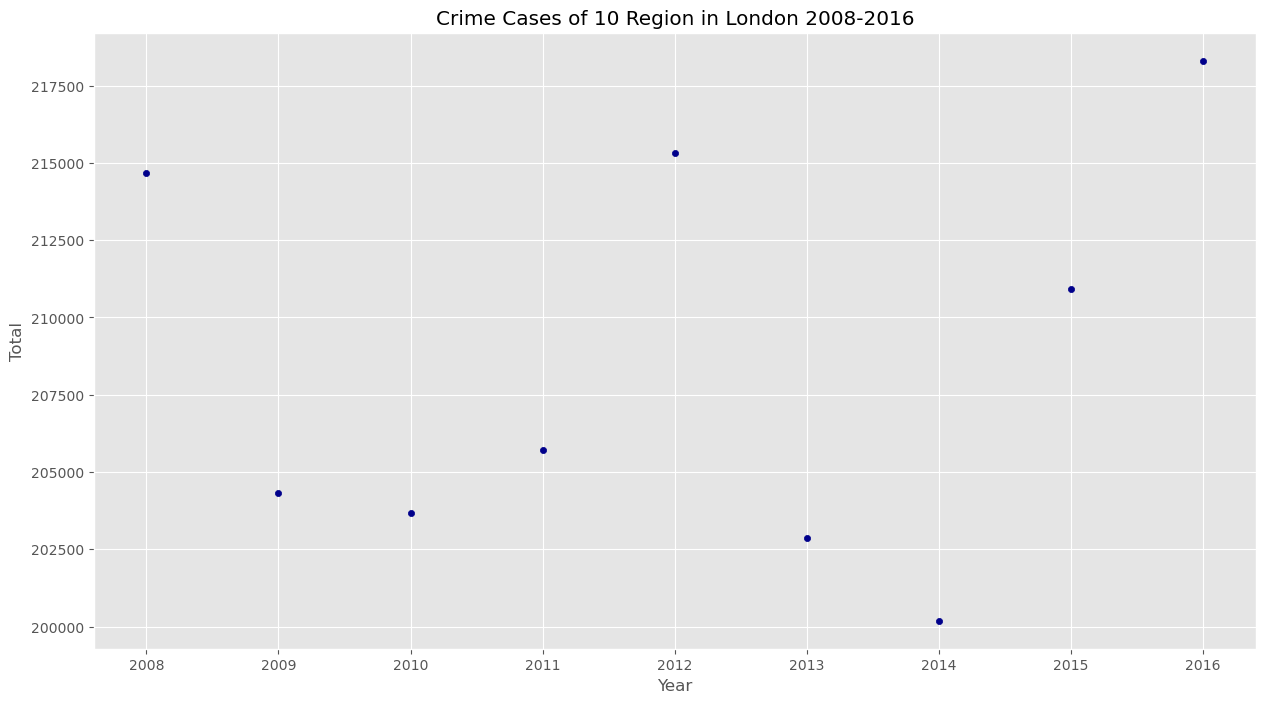

In [14]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(15,8), color='darkblue')

plt.title("Crime Cases of 10 Region in London 2008-2016");
plt.ylabel("Total");
plt.xlabel("Year");
plt.show();

Kesimpulan : Berdasarkan Scatter Plot di atas, menunjukkan pola data yang menyebar sehingga tidak terdapat korelasi antar variabel dimana variabel (Y) tidak dipengaruhi oleh variabel (X). 

#### Area Plot

**Pertanyaan 1** : Bagaimana perbandingan jumlah kasus kriminalitas di wilayah Hillingdon, Newham, dan Merton dari Tahun 2008-2016?

mengambil tabel dari DataFrame baru yang berisi 3 wilayah di London

In [15]:
years = list(range(2008, 2017))
br = ['Hillingdon', 'Newham', 'Merton']
hnm = df_new.loc[br, years]
hnm

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Hillingdon,24318,24605,23421,24282,22103,20248,23128,23234,24341
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090
Merton,13875,13561,13595,13548,12856,11595,11596,12273,12755


membuat area plot dari 3 wilayah di London

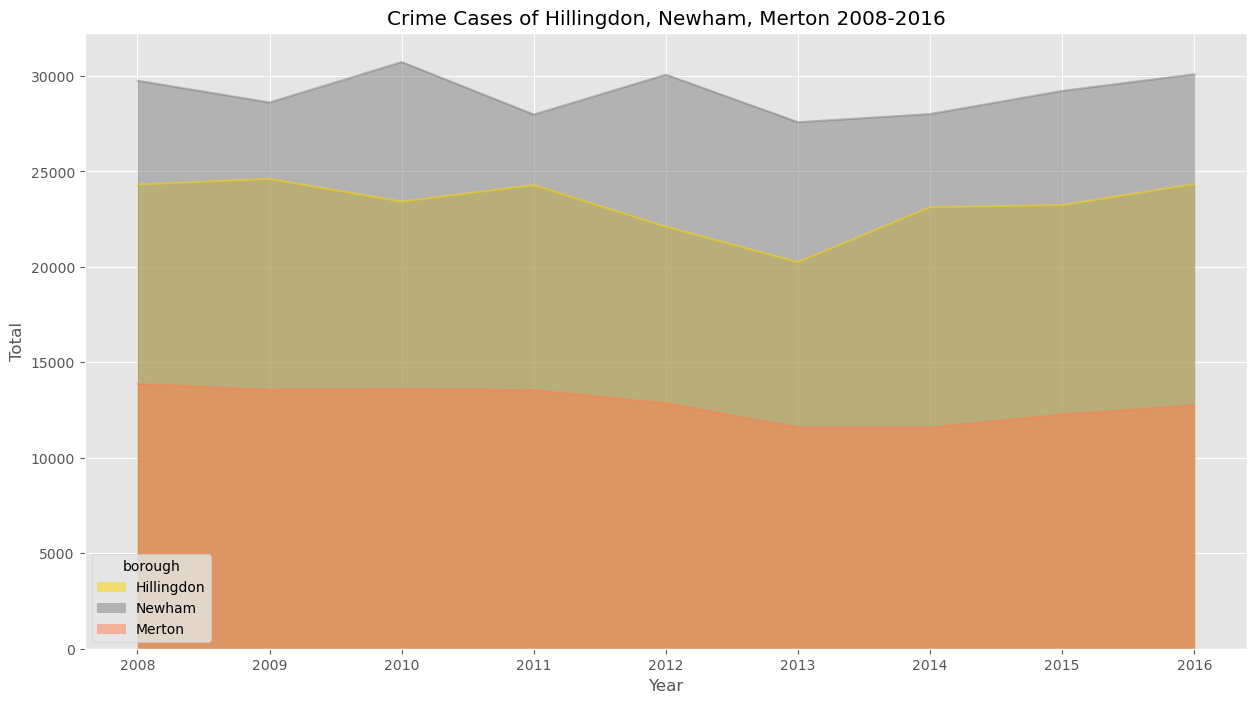

In [16]:
hnm.T.plot(kind='area', 
           stacked=False,
           color=['gold', 'grey', 'coral'],
           figsize=(15, 8));

plt.title("Crime Cases of Hillingdon, Newham, Merton 2008-2016");
plt.ylabel("Total");
plt.xlabel("Year");

Kesimpulan : Berdasarkan Area Plot di atas, wilayah Newham menempati posisi teratas dengan kasus kriminal terbanyak dibandingkan wilayah Hillingdon dan Merton.

#### Box Plot

**Pertanyaan 2** : Bagaimana Box Plot dari total kasus kriminalitas di 5 wilayah teratas di London sepanjang Tahun 2008-2016?

mengambil tabel dari DataFrame baru yang berisi total kasus dari 5 wilayah teratas di London

In [17]:
years = list(range(2008, 2017))
top5_index = df_new['Total'].sort_values(ascending=False).head().index
top5_df = df_new.loc[top5_index, years]
top5_df = top5_df.T

melihat statistika deskriptif DataFrame

In [18]:
top5_df.describe()

borough,Westminster,Lambeth,Southwark,Camden,Newham
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,50558.666667,32464.222222,30978.777778,30571.888889,29113.777778
std,4201.683918,1014.515005,1215.293049,2121.547633,1119.162385
min,47395.000000,31225.000000,28912.000000,27198.000000,27577.000000
25%,47846.000000,31717.000000,30623.000000,29183.000000,28005.000000
50%,48330.000000,31868.000000,30737.000000,31472.000000,29217.000000
75%,53852.000000,33224.000000,31320.000000,31804.000000,30067.000000
max,59226.000000,34071.000000,33470.000000,33956.000000,30728.000000


membuat boxplot dari 5 wilayah teratas di London

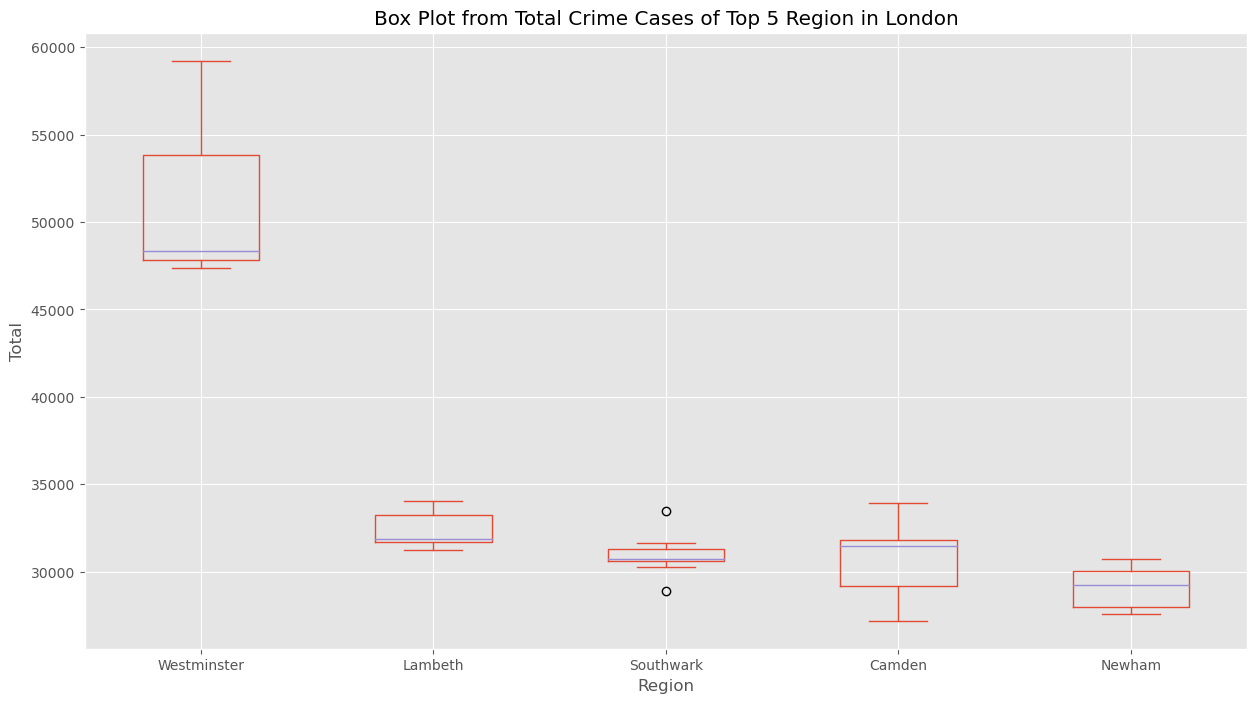

In [19]:
top5_df.plot(kind='box', figsize=(15, 8));

plt.title("Box Plot from Total Crime Cases of Top 5 Region in London");
plt.ylabel("Total");
plt.xlabel("Region");

Kesimpulan : Berdasarkan Box Plot di atas, nilai median dari 5 wilayah teratas yaitu wilayah Westminster memiliki nilai median terbesar dibandingkan wilayah Lambeth, Southwark, Camden, Newham. Sedangkan wilayah Newham memiliki nilai median terkecil diantara 4 wilayah yang lain. 

#### Histogram

**Pertanyaan 3** : Bagaimana distribusi dari Total kasus kriminalitas di wilayah Greenwich, Croydon, dan Barnet dari Tahun 2008-2016?

mengambil tabel dari DataFrame baru yang berisi 3 wilayah di London

In [20]:
years = list(range(2008, 2017))
df_gcb = df_new.loc[['Greenwich', 'Croydon', 'Barnet'], years]
df_gcb

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Greenwich,22010,19851,18626,18552,20028,18948,19894,20929,22730
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684


membuat histogram dari 3 wilayah di London

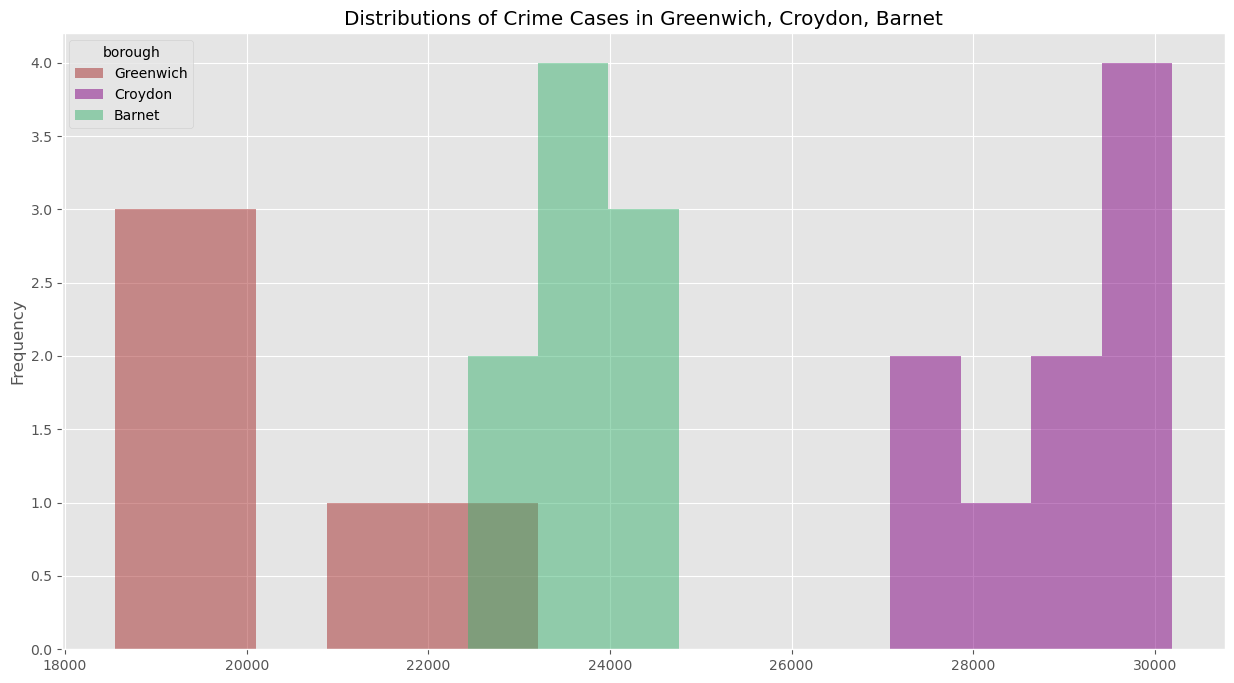

In [21]:
df_gcb.T.plot(kind='hist',
                alpha=0.5,
                bins=15,
                figsize=(15,8),
                color=['brown', 'purple', 'mediumseagreen']);

plt.title("Distributions of Crime Cases in Greenwich, Croydon, Barnet");

Kesimpulan : Berdasarkan Histogram di atas, wilayah Croydon memiliki distribusi total kasus terbanyak dibandingkan wilayah Greenwich dan Barnet.

#### Pie Chart

**Pertanyaan 5** : Bagaimana persentase dari kasus kriminalitas berdasarkan major_category di London dari Tahun 2008-2016?

mengelompokkan major_category menjadi 1 tabel

In [22]:
df_major = df_lc.groupby('major_category').sum()
df_major

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


membuat pie chart dari tabel major_category

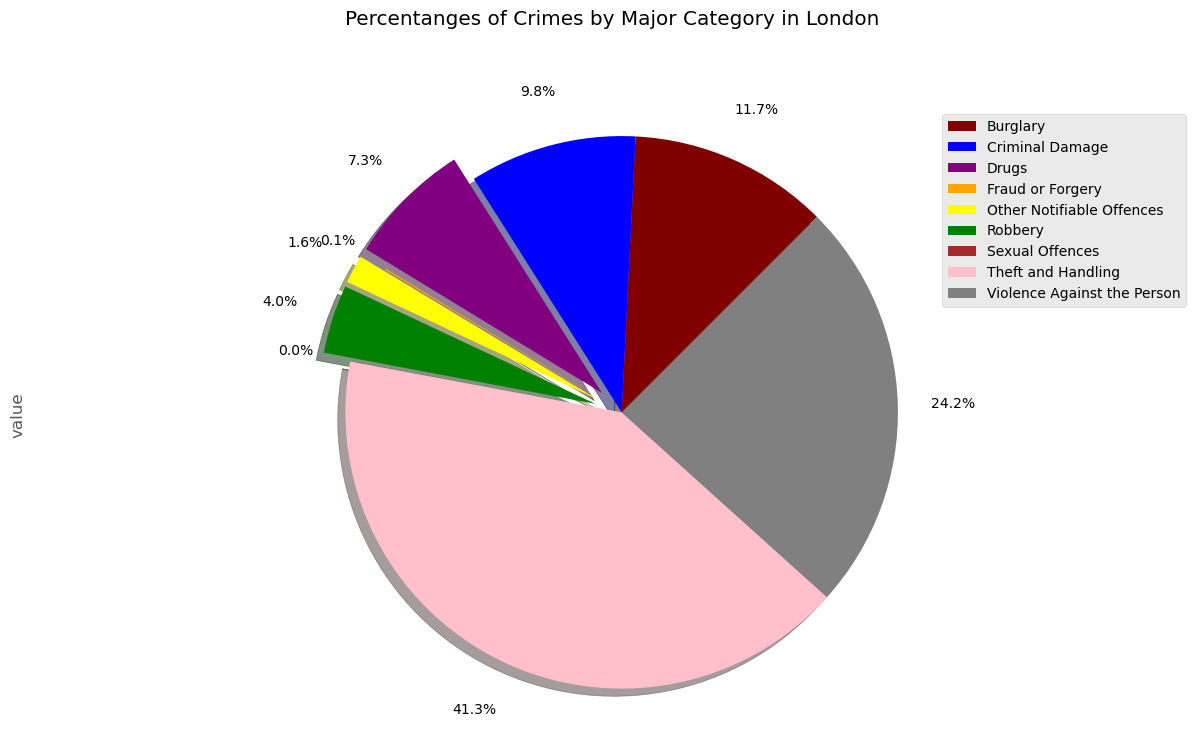

In [23]:
explode_list = [0,0,0.1,0,0.1,0.1,0,0,0]
my_colors = ["maroon", "blue", "purple", "orange", "yellow", "green", "brown", "pink", "grey"]
df_major['value'].plot(kind='pie',
                            figsize=(15,8),         
                            autopct="%.1f%%",
                            colors = my_colors,      
                            startangle=45,          
                            shadow=True,            
                            labels=None,            
                            pctdistance=1.2,       
                            explode=explode_list);

plt.legend(labels=df_major.index);
plt.title("Percentanges of Crimes by Major Category in London", y=1.12);
plt.axis('equal');

Kesimpulan : Berdasarkan Pie Chart di atas, disimpulkan bahwa jenis kasus kriminal tertinggi di London sepanjang Tahun 2008-2016 berdasarkan *major_category* yaitu *Theft and Handling* sebanyak 41,3%. Sedangkan, jenis kasus kriminal terendah yaitu *Sexual Offences* sebanyak 0,0% dan *Fraud or Forgery* sebanyak 0,1%.

#### Bar Chart

**Pertanyaan 6** : Bagaimana perbandingan dari total kasus kriminalitas di London pada masing-masing wilayahnya dari Tahun 2008-2016?

mengelompokkan borough menjadi 1 tabel

In [24]:
df_borough = df_lc.groupby('borough').sum()
df_borough

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


membuat bar chart dari tabel borough

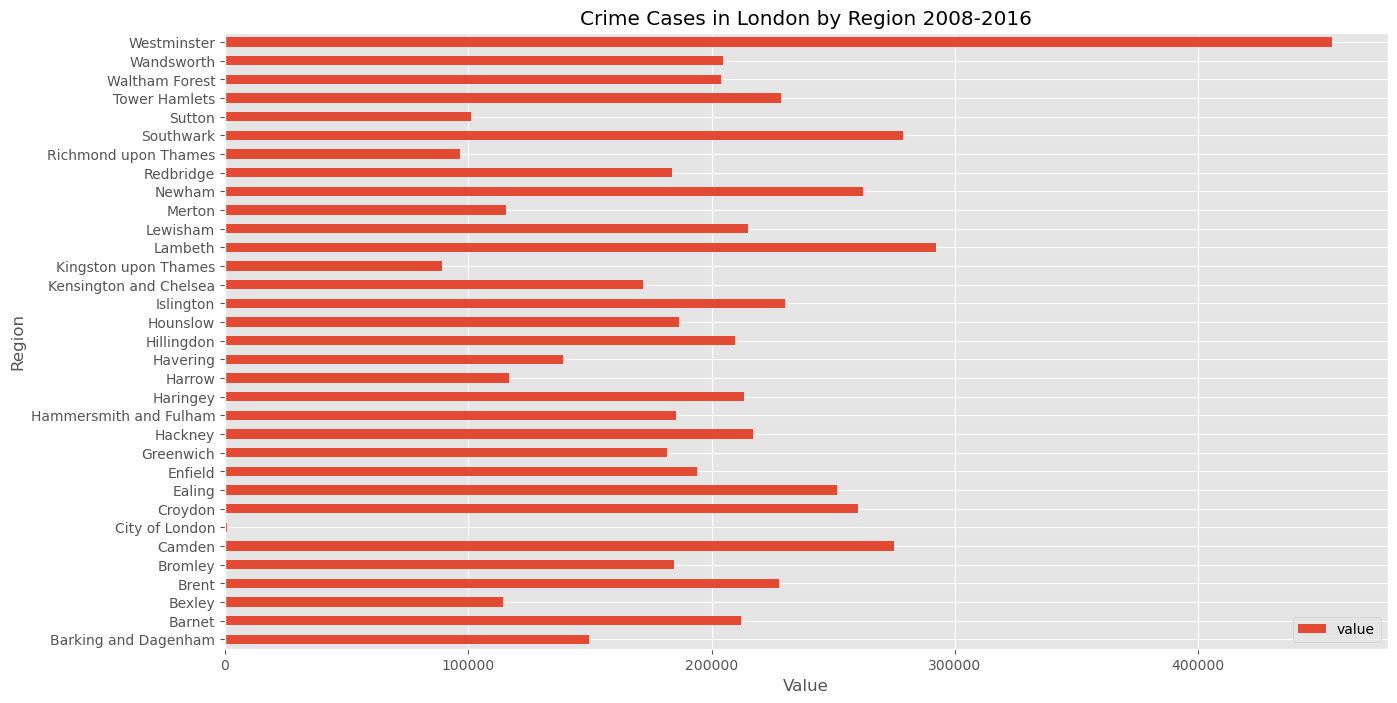

In [25]:
df_borough.plot(kind='barh', figsize=(15,8));

plt.title("Crime Cases in London by Region 2008-2016");
plt.ylabel("Region");
plt.xlabel("Value");

Kesimpulan : Berdasarkan Bar Plot di atas, dari seluruh wilayah London sepanjang tahun 2008-2016 wilayah Westminster memiliki jumlah kasus kriminal tertinggi. Sedangkan, wilayah City of London memiliki jumlah kasus kriminal terendah.

### Word Clouds

**Pertanyaan 8** : Kasus kriminalitas apa saja yang paling sering muncul di London berdasarkan minor_category?

membuat variabel untuk membaca text dari kolom minor_category 

In [26]:
text = " ".join(review for review in df_lc.minor_category)

membuat WordCloud dari minor_category

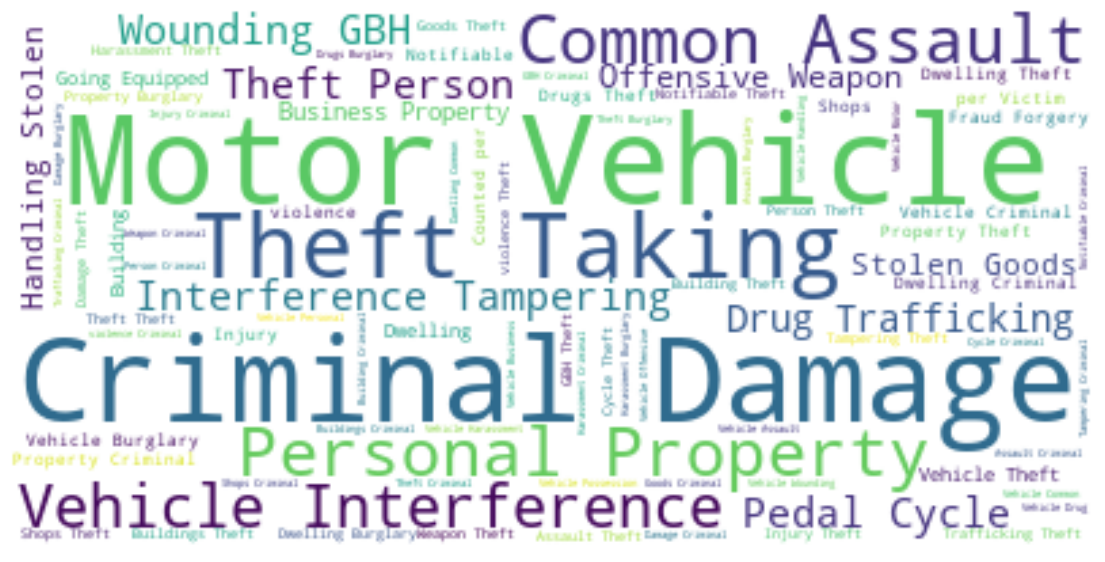

In [27]:
stopwords = set(STOPWORDS)
minor_wc = WordCloud(background_color="white", 
                     max_words= 2000, 
                     stopwords=stopwords
                     ).generate(text)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(minor_wc, interpolation='bilinear');
plt.axis('off');

### Folium Maps

**Pertanyaan 9** : Buatlah Maps London berdasarkan wilayah yang terdapat kasus kriminalitas!

membuat variabel untuk membaca file json

In [28]:
london_boroughs = r'london_boroughs.json'

membuat folium map London

In [29]:
latitude = 51.5287352
longitude = -0.3817895
london_map = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.Choropleth(
    geo_data = london_boroughs,
    data = df_lc,
    columns = ['borough', 'value'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Crime Rate'
).add_to(london_map)

london_map

### Overall Analysis

Secara keseluruhan dapat disimpulkan bahwa : 
- Pada Scatter Plot, menunjukkan bahwa pola data yang menyebar sehingga tidak terdapat korelasi antar variabel dimana variabel (Y) tidak dipengaruhi oleh variabel (X).
- Pada Area Plot, wilayah Newham menempati posisi teratas dengan kasus kriminal terbanyak dibandingkan wilayah Hillingdon dan Merton. 
- Pada Box Plot, nilai median dari 5 wilayah teratas yaitu wilayah Westminster memiliki nilai median terbesar dibandingkan wilayah Lambeth, Southwark, Camden, Newham. 
- Pada Histogram, wilayah Croydon memiliki distribusi total kasus terbanyak dibandingkan wilayah Greenwich dan Barnet. 
- Pada Pie Chart, disimpulkan bahwa jenis kasus kriminal tertinggi di London sepanjang Tahun 2008-2016 berdasarkan *major_category* yaitu *Theft and Handling* sebanyak 41,3%. 
- Pada Bar Plot, dari seluruh wilayah London sepanjang tahun 2008-2016 wilayah Westminster memiliki jumlah kasus kriminal tertinggi.